In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Task 2: Parameter Optimization

Consider the following dataset:
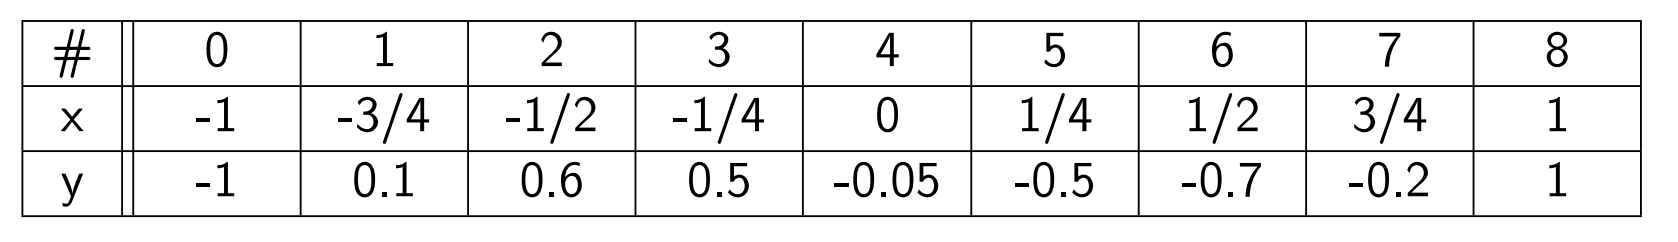

which has been generated by adding gaussian noise to the function $y=3x^3-2x$. Use a polynomial $\hat y = \sum_{i=0}^{3} w_i x^i$ model of degree $M=3$ to approximate the data model.

In [3]:
# data-set
x = np.array([-1, -3/4, -1/2, -1/4,     0,  1/4,  1/2,  3/4, 1])
y = np.array([-1,  0.1,  0.6,  0.5, -0.05, -0.5, -0.7, -0.2, 1])

x_test = np.linspace(-1, 1, 50)

# polynomial approximation
y_hat = lambda x, w: w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

# true function
y_true = lambda x: 3*x**3 - 2*x

In [4]:
def plot_function_approx(weights):
  plt.figure()
  plt.plot(x_test, y_true(x_test),color='blue', label='true function')
  plt.scatter(x, y, marker='x', color='black', label='data-set')
  plt.plot(x_test, y_hat(x_test, weights), '--', color='red', label='polynomial approximation')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

a) Looking at the true function, what do you expect the values for the optimal parameters w0 to w3 to be? Fill in the parameter values below and validate your assumption using the plot.

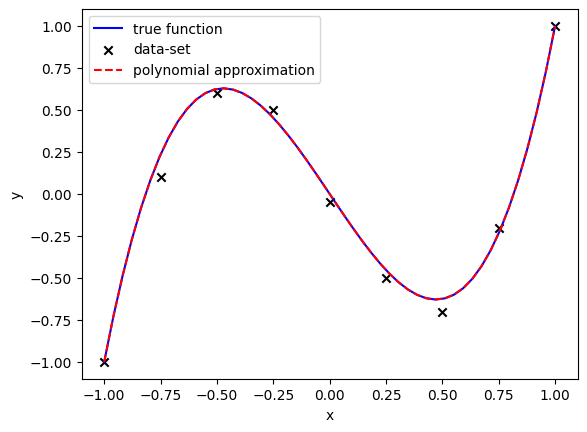

In [5]:
# TODO: exchange the parameter values for w0 to w3 with your assumption
w0 = 0
w1 = -2
w2 = 0
w3 = 3

w = np.array([w0, w1, w2, w3])

plot_function_approx(w)

In a more realistic setting we obviously do not know the true function. For the linear data models, the optimal weights can be calculated by minimizing the mean squared error analytically, by calculating the gradient of the error and setting it to zero. For this the so called design matrix is used. In the following tasks first calculate the design matrix and then calculate the weights in closed form.

b) Complete the function that computes the design matrix for the polynomial of degree M=3 and a given dataset.

In [6]:
def design_matrix(x, M=3):
  """
  @param x: the x-values of the given data points
  @param M: the degree of the polynomial
  @return: the design matrix
  """
  # TODO: calculate the design matrix for a polynomial of degree M
  matrix = np.zeros((x.shape[0], M + 1))

  for i in range(x.shape[0]):
    for j in range(M + 1):
      matrix[i, j] = x[i]**j

  return matrix

In [7]:
# cell for testing your implementation of task b
des_mat = design_matrix(x)
print(des_mat)

[[ 1.       -1.        1.       -1.      ]
 [ 1.       -0.75      0.5625   -0.421875]
 [ 1.       -0.5       0.25     -0.125   ]
 [ 1.       -0.25      0.0625   -0.015625]
 [ 1.        0.        0.        0.      ]
 [ 1.        0.25      0.0625    0.015625]
 [ 1.        0.5       0.25      0.125   ]
 [ 1.        0.75      0.5625    0.421875]
 [ 1.        1.        1.        1.      ]]


c) Calculate the weights in closed form. What causes the difference between the approximated and true function?

In [9]:
def calculate_weights(phi, y):
  """
  @param phi: the design matrix
  @param y: the y-values of the given data points
  @return: the optimal weights
  """

  # TODO: calculate the optimal weights

  w = np.linalg.inv(phi.T @ phi) @ phi.T @ y

  return w

Optimal weights: 
 w0 = -0.035714285714285726,
 w1 = -1.9915824915824911,
 w2 = 0.01904761904761898,
 w3 = 3.016835016835016


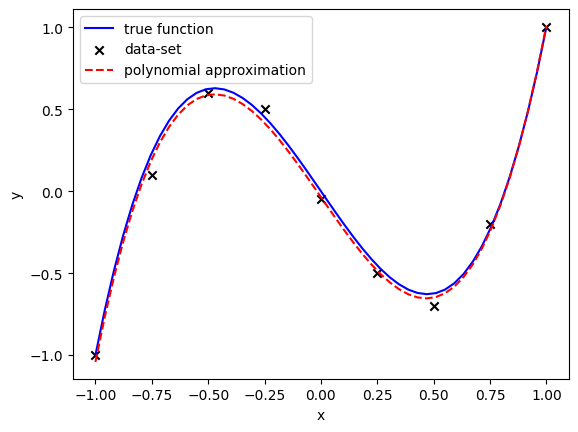

In [10]:
# calculate optimal weights using your design matrix
opt_w = calculate_weights(design_matrix(x), y)

print(f"Optimal weights: \n w0 = {opt_w[0]},\n w1 = {opt_w[1]},\n w2 = {opt_w[2]},\n w3 = {opt_w[3]}")

plot_function_approx(opt_w)

d) To validate the results we want to compute the mean squared error. Complete the function below that returns the error given the weights and test data.

In [11]:
def MSE_Error(weights, x, y, M=3):
  """
  @param x: the x-values of the given data points
  @param y: the y-values of the given data points
  @param weights: the optimal weights
  """
  # TODO: calculate the design matrix for the given data points
  des_matrix = design_matrix(x, M=M)

  # TODO: use the design matrix to compute the approximated funciont values y_h
  y_h = des_matrix @ weights

  # TODO: compute the mean squared error
  error = np.mean((y - y_h)**2)

  return error

e) Approximate the function using only the first four data points (0 – 3) from the table. What do you
expect for the parameters w? Compute their values and compute the error for the remaining five samples.

Optimal weights: 
 w0 = -0.19999999999992601,
 w1 = -3.9999999999992752,
 w2 = -4.799999999998924,
 w3 = 5.524469770534779e-13
Error = 28.160499999986


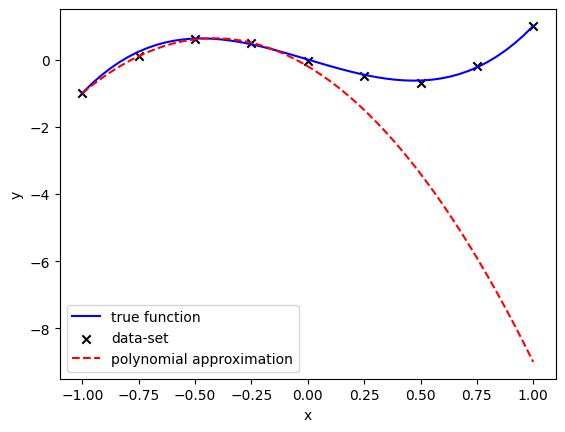

In [12]:
# TODO: get the first four data points and compute the optimal weights using them

x_data = x[:4]
y_data = y[:4]

des_mat = design_matrix(x_data)

opt_w = calculate_weights(des_mat, y_data)

# TODO: use the test data to validate your results (compute the error and plot the results)
error = MSE_Error(opt_w, x[4:], y[4:])

print(f"Optimal weights: \n w0 = {opt_w[0]},\n w1 = {opt_w[1]},\n w2 = {opt_w[2]},\n w3 = {opt_w[3]}")
print(f"Error = {error}")

plot_function_approx(opt_w)

f) For which choice of four samples do you expect the best approximation? Compute the resulting
values and the generalization error for the remaining five samples. (If you want to make more than an informed guess you can also implement trying out all combinations of four samples.)

Best sampled: (0, 4, 5, 8)
Best weights: 
 w0 = -0.05000000000000168,
 w1 = -1.9999999999999885,
 w2 = 0.050000000000000766,
 w3 = 2.9999999999999893
Best error: 0.005234374999999921


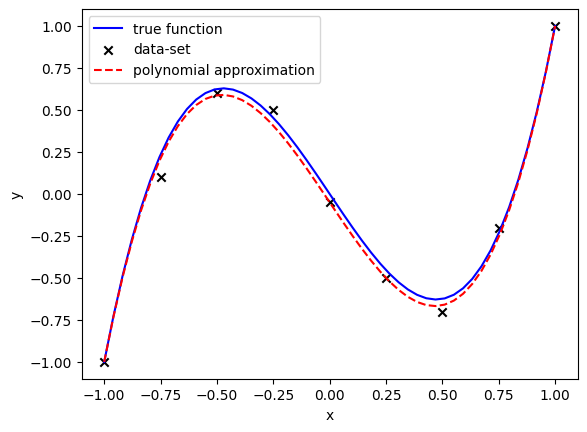

In [13]:
# d) Best approximation and generalization error for the remaining five samples
best_error = float('inf')
best_w = None
best_samples = None

# Trying all combinations of 4 samples and computing the error for the rest
for samples in combinations(range(len(x)), 4):
    x_samples = x[np.array(samples)]
    y_samples = y[np.array(samples)]

    des_mat = design_matrix(x_samples)
    w_samples = calculate_weights(des_mat, y_samples)

    # Compute error for the remaining points
    remaining_points = set(range(len(x))) - set(samples)
    x_rem = x[list(remaining_points)]
    y_rem = y[list(remaining_points)]

    error = MSE_Error(w_samples, x_rem, y_rem)

    if error < best_error:
        best_error = error
        best_w = w_samples
        best_samples = samples

print(f"Best sampled: {best_samples}")
print(f"Best weights: \n w0 = {best_w[0]},\n w1 = {best_w[1]},\n w2 = {best_w[2]},\n w3 = {best_w[3]}")
print(f"Best error: {best_error}")

plot_function_approx(best_w)
